<a href="https://colab.research.google.com/github/YugeshwarV/Brain-Tumor-Project/blob/main/BT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [53]:
# Importing the required packages
import os

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import torchvision

import random

import cv2

import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

from torchvision.models import resnet50

from torchvision.models import efficientnet_b0

from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.data import DataLoader

from torchvision import datasets, transforms

from sklearn.metrics import classification_report, confusion_matrix

from PIL import Image

In [ ]:
os.chdir("/content/drive/MyDrive/DS Projects/Brain Tumor Project")

In [ ]:
img = Image.open("Tumour/train/glioma/Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c0133.jpg")

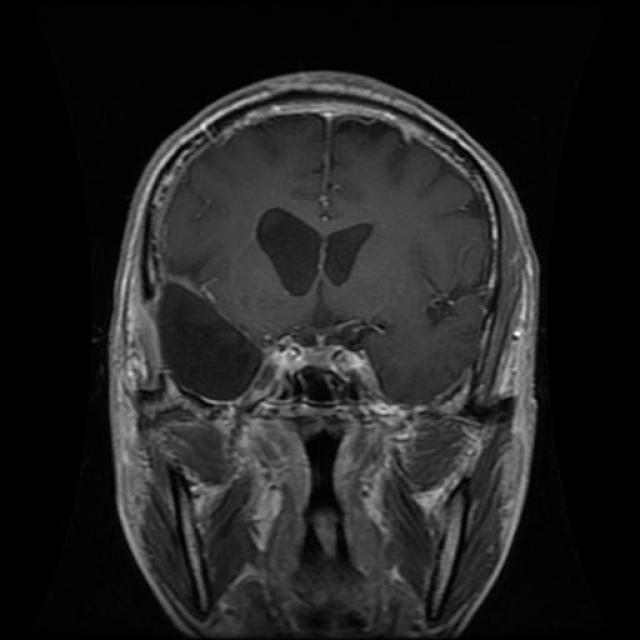

In [ ]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
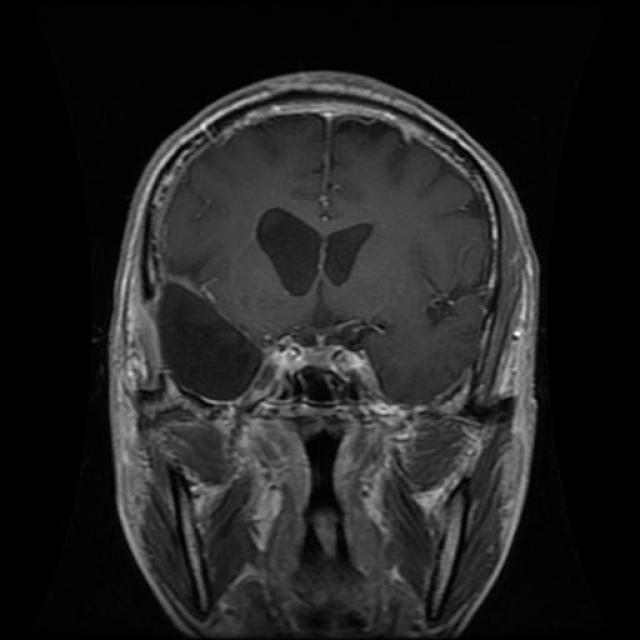

In [ ]:
np.array(img)

In [ ]:
img.size

(640, 640)

In [ ]:
# Checking for the shape of the images

for i in os.listdir("Tumour/train/glioma"):
  img = Image.open("Tumour/train/glioma/"+i)
  print(i, "===", img.size)

Tr-gl_0337_jpg.rf.198879c2cae9bad690910f0a6b182005.jpg === (640, 640)
Tr-gl_0312_jpg.rf.1383439af0161e29a269769bdce2906d.jpg === (640, 640)
Tr-gl_0276_jpg.rf.ea9cf5831f4ca116614b91cf5eab441b.jpg === (640, 640)
Tr-gl_0341_jpg.rf.9464a808dd74014126c64a375d6aa4ec.jpg === (640, 640)
Tr-gl_0238_jpg.rf.955032927ed4181a1bbc6ca93f920ab2.jpg === (640, 640)
Tr-gl_0270_jpg.rf.875040796d2cae86c0f6608d3ca7a060.jpg === (640, 640)
Tr-gl_0330_jpg.rf.62861b7d4b6f5b8cf06268948f4e9c8d.jpg === (640, 640)
Tr-gl_0279_jpg.rf.3d4c5e585f28b92ff96a0dd65d37ad58.jpg === (640, 640)
Tr-gl_0267_jpg.rf.b5e1d7bb6be54b36f18897246afa0a84.jpg === (640, 640)
Tr-gl_0309_jpg.rf.d24b614262f1ec73c6f0970063424541.jpg === (640, 640)
Tr-gl_0344_jpg.rf.82d7b0eb9a8e8ee0e903d46e283b6a46.jpg === (640, 640)
Tr-gl_0316_jpg.rf.db7536b64bb257fd45be181b2077d631.jpg === (640, 640)
Tr-gl_0332_jpg.rf.079b14c6e605effb7a3aaf961b18a8df.jpg === (640, 640)
Tr-gl_0329_jpg.rf.38d02f2dc698286284714ad2cc667b4f.jpg === (640, 640)
Tr-gl_0239_jpg.rf.68

In [ ]:
for i in os.listdir("Tumour/train/meningioma"):
  img = Image.open("Tumour/train/meningioma/"+i)
  print(i, "===", img.size)

Tr-me_0148_jpg.rf.03a9b9cffb6fe3b844f31410c4ec470f.jpg === (640, 640)
Tr-me_0152_jpg.rf.f62837fa66bb0bbad845223eaf7830a9.jpg === (640, 640)
Tr-me_0151_jpg.rf.3a8273066ee5ebd1e4ea268c682cc7cf.jpg === (640, 640)
Tr-me_0164_jpg.rf.c76110dd43fa0f954c7301bfafc092ad.jpg === (640, 640)
Tr-me_0123_jpg.rf.596ebd76798965590514c0ecd47bc764.jpg === (640, 640)
Tr-me_0159_jpg.rf.f73dc09812f101d40c434dbcbaa779c0.jpg === (640, 640)
Tr-me_0173_jpg.rf.cd303dc14d39ed6a40984a9ce2d544ca.jpg === (640, 640)
Tr-me_0171_jpg.rf.603c7e311c3b01f149696e990c118e55.jpg === (640, 640)
Tr-me_0124_jpg.rf.95eacbf2ba8c3ac6b4ce0937727d251f.jpg === (640, 640)
Tr-me_0136_jpg.rf.315e4dfeab86bd7ec15352c42e250058.jpg === (640, 640)
Tr-me_0129_jpg.rf.9d65591c2f1228c5948140e2d10151a3.jpg === (640, 640)
Tr-me_0157_jpg.rf.6c9ba1773e106225551869b1ca6ff862.jpg === (640, 640)
Tr-me_0158_jpg.rf.e7e5a8fbadce6bf6471d37299717b05e.jpg === (640, 640)
Tr-me_0165_jpg.rf.295ccc37de6f113a6e36f0d9dc5c0e7c.jpg === (640, 640)
Tr-me_0153_jpg.rf.df

In [ ]:
for i in os.listdir("Tumour/train/no_tumor"):
  img = Image.open("Tumour/train/no_tumor/"+i)
  print(i, "===", img.size)

Tr-no_0319_jpg.rf.53244847c205f5449a4527802a16c27c.jpg === (640, 640)
Tr-no_0496_jpg.rf.4055b727e947fd86a7f9899a2bd76d39.jpg === (640, 640)
Tr-no_0520_jpg.rf.0773ebdd5afc970157af38c082340d1c.jpg === (640, 640)
Tr-no_0435_jpg.rf.a2b6fedddca7130f554911f75b2f7a6f.jpg === (640, 640)
Tr-no_0304_jpg.rf.dce38dce4060d6aced38885cdc927261.jpg === (640, 640)
Tr-no_0548_jpg.rf.13a97d203ef8a3c0e0d95d10d4696e42.jpg === (640, 640)
Tr-no_0318_jpg.rf.a38f36810b9ff4891d33c2a37bbc1121.jpg === (640, 640)
Tr-no_0494_jpg.rf.bbe76f4684564ea0b9c03af9bac7d989.jpg === (640, 640)
Tr-no_0414_jpg.rf.e3ce10bd7d6bed4c80358ae665b11619.jpg === (640, 640)
Tr-no_0441_jpg.rf.7bf1cc579b4eeaaaee1b395fca06ff0e.jpg === (640, 640)
Tr-no_0504_jpg.rf.225c3663abe7b900b8d7e49c987d6c0d.jpg === (640, 640)
Tr-no_0412_jpg.rf.2137e0e20519bfb09b2fa4d844cd84e4.jpg === (640, 640)
Tr-no_0559_jpg.rf.f59b2f591d5e3227f428786cb3e59e9e.jpg === (640, 640)
Tr-no_0357_jpg.rf.977d5e671f243dc28e6403c4a811ea74.jpg === (640, 640)
Tr-no_0481_jpg.rf.2a

In [ ]:
for i in os.listdir("Tumour/train/pituitary"):
  img = Image.open("Tumour/train/pituitary/"+i)
  print(i, "===", img.size)

Tr-pi_0297_jpg.rf.f29d11423f24c768344e50ca20d152cb.jpg === (640, 640)
Tr-pi_0219_jpg.rf.af1fb078b70ec94fb6d5d26f594fecb4.jpg === (640, 640)
Tr-pi_0212_jpg.rf.a26ad8faf517ce96fed4a501443c097f.jpg === (640, 640)
Tr-pi_0264_jpg.rf.2f506366beb51f23ea527587d9943420.jpg === (640, 640)
Tr-pi_0237_jpg.rf.cb7f775c4d13dd515d8fa24628322c12.jpg === (640, 640)
Tr-pi_0259_jpg.rf.bcbb78476c69b9ca387371c06f682f15.jpg === (640, 640)
Tr-pi_0289_jpg.rf.b77979231504d802c627d0422f650f9d.jpg === (640, 640)
Tr-pi_0257_jpg.rf.9c86f9a7a7efeb219f70a5db67d9273b.jpg === (640, 640)
Tr-pi_0238_jpg.rf.7fa9639ab107c686bb70e9e1714108d5.jpg === (640, 640)
Tr-pi_0298_jpg.rf.34d1ee4c29a8ce6ca52896b16076bdc2.jpg === (640, 640)
Tr-pi_0236_jpg.rf.9fcc82e0ec535fe9b58bdd06fb0fde87.jpg === (640, 640)
Tr-pi_0252_jpg.rf.1a1607930af1d4c20ad9c836cadf531e.jpg === (640, 640)
Tr-pi_0277_jpg.rf.a3d0518540d1ec6fae8ef22a2fb8424f.jpg === (640, 640)
Tr-pi_0294_jpg.rf.109854667d94aa10cb318268f7b3b4af.jpg === (640, 640)
Tr-pi_0248_jpg.rf.24

Image counts per class:
no_tumor: 335
meningioma: 358
glioma: 564
pituitary: 438


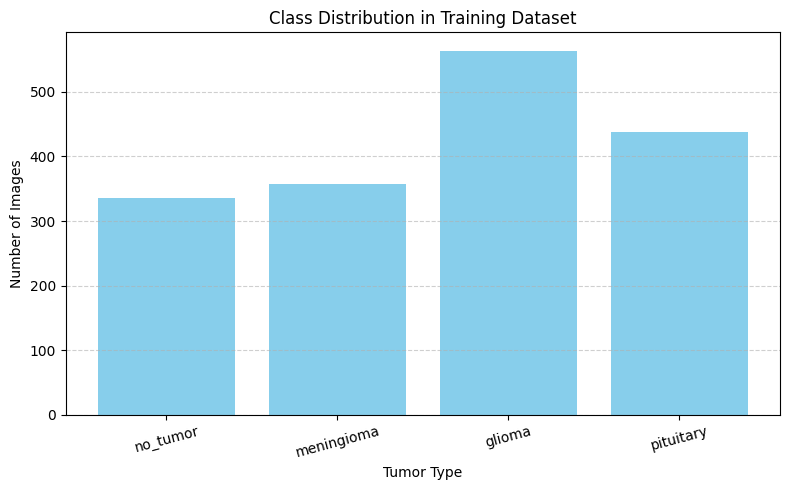

In [ ]:
# Defining training directory path
train_dir = "Tumour/train"

# Get class names and image counts
class_counts = {}
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        image_count = len(os.listdir(category_path))
        class_counts[category] = image_count

# Print image counts
print("Image counts per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Visualize the class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


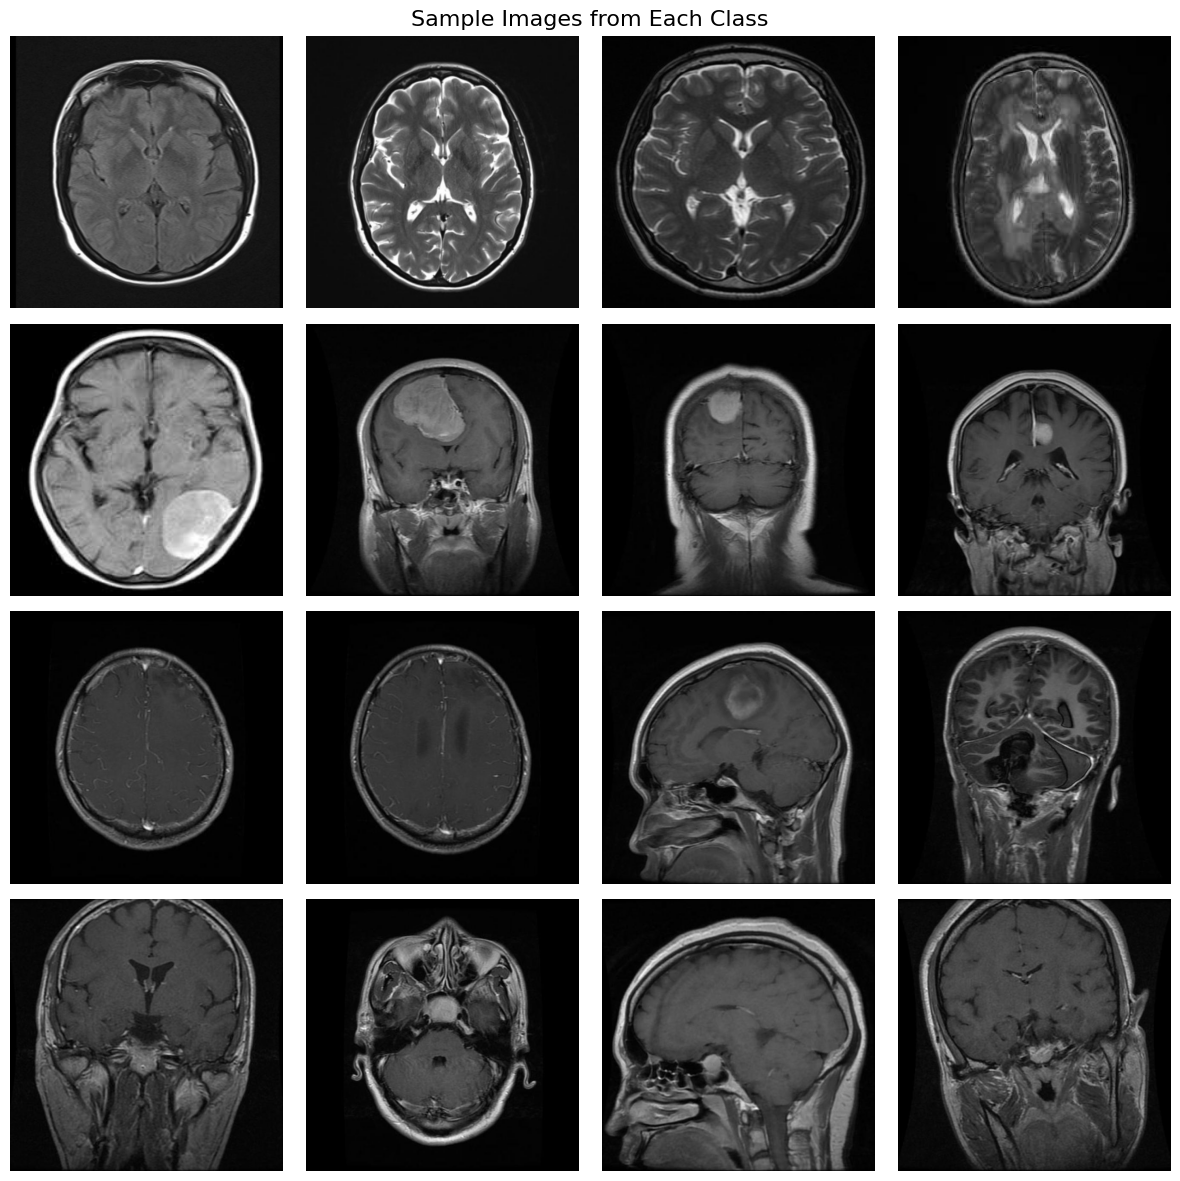

In [ ]:
def plot_sample_images(dataset_dir, categories, samples_per_class=4):
    plt.figure(figsize=(samples_per_class * 3, len(categories) * 3))
    for row, category in enumerate(categories):
        category_path = os.path.join(dataset_dir, category)
        image_files = os.listdir(category_path)
        sample_files = random.sample(image_files, samples_per_class)
        for col, image_file in enumerate(sample_files):
            image_path = os.path.join(category_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.subplot(len(categories), samples_per_class, row * samples_per_class + col + 1)
            plt.imshow(image)
            plt.axis('off')
            if col == 0:
                plt.ylabel(category, fontsize=12)
    plt.suptitle('Sample Images from Each Class', fontsize=16)
    plt.tight_layout()
    plt.show()

# Usage
categories = list(class_counts.keys())
plot_sample_images(train_dir, categories)


In [ ]:
# Data Preprocessing and Data Augmentation

# Preprocessing and augmentation for training
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize grayscale to mean=0.5, std=0.5

])

# Preprocessing for validation/test (no augmentation)
test_val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [ ]:
# Dataset paths
train_dir = "Tumour/train"
val_dir = "Tumour/valid"
test_dir = "Tumour/test"

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=test_val_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_val_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Class names
class_names = train_dataset.classes
print("Classes:", class_names)


Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


In [ ]:

class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):  # 4 classes: glioma, meningioma, no_tumor, pituitary
        super(BrainTumorCNN, self).__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Input: 3x224x224 → 32x224x224
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)                 # → 32x112x112
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # → 64x112x112
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)                 # → 64x56x56
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # → 128x56x56
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)                 # → 128x28x28
        )

        self.conv_block4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))


        self.fc = nn.Sequential(
          nn.Flatten(),
          nn.Dropout(0.6),
          nn.Linear(128, 128),
          nn.ReLU(),
          nn.Dropout(0.4),
          nn.Linear(128, num_classes)
      )


    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.adaptive_pool(x)
        x = self.fc(x)
        return x


In [ ]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [ ]:
model = BrainTumorCNN(num_classes=4).to(device)

In [ ]:
model

BrainTumorCNN(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


# Loop settings
num_epochs = 15

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
patience =10
trigger_times = 0

In [ ]:

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # Training initialisation
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Training
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels) # loss calculation
        loss.backward()             # Back propagation
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = correct / total
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = val_correct / val_total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    print(f"Val Loss: {val_loss / len(val_loader):.4f}, Accuracy: {val_acc:.4f}")

        # After validation
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("✔️ Saved best model")
    else:
        trigger_times += 1
        print(f"⚠️ No improvement. Patience count: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("⛔ Early stopping triggered.")
            break




Epoch 1/15
Train Loss: 0.5793, Accuracy: 0.7705
Val Loss: 1.3053, Accuracy: 0.5558
✔️ Saved best model

Epoch 2/15
Train Loss: 0.5540, Accuracy: 0.7811
Val Loss: 0.4174, Accuracy: 0.8725
✔️ Saved best model

Epoch 3/15
Train Loss: 0.5733, Accuracy: 0.7847
Val Loss: 0.6966, Accuracy: 0.7869
⚠️ No improvement. Patience count: 1/10

Epoch 4/15
Train Loss: 0.5893, Accuracy: 0.7658
Val Loss: 1.6211, Accuracy: 0.4263
⚠️ No improvement. Patience count: 2/10

Epoch 5/15
Train Loss: 0.5388, Accuracy: 0.8029
Val Loss: 2.4449, Accuracy: 0.3865
⚠️ No improvement. Patience count: 3/10

Epoch 6/15
Train Loss: 0.5271, Accuracy: 0.7917
Val Loss: 0.4362, Accuracy: 0.8287
⚠️ No improvement. Patience count: 4/10

Epoch 7/15
Train Loss: 0.5185, Accuracy: 0.7947
Val Loss: 0.4250, Accuracy: 0.8606
⚠️ No improvement. Patience count: 5/10

Epoch 8/15
Train Loss: 0.5126, Accuracy: 0.7870
Val Loss: 1.1607, Accuracy: 0.4602
⚠️ No improvement. Patience count: 6/10

Epoch 9/15
Train Loss: 0.5168, Accuracy: 0.7917

In [ ]:
# Transfer Learning

#Pretrained model - ResNet50

# Load ResNet50 pretrained on ImageNet
model = resnet50(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected (fc) layer
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 4)  # 4 tumor classes
)

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 113MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
best_val_loss = float('inf')
patience = 5
trigger_times = 0
num_epochs = 15

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # Train
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_acc = correct / total
    train_loss = running_loss / len(train_loader)
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    # Validate
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = val_correct / val_total
    val_loss /= len(val_loader)
    print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    # Early Stopping & Save Best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), "best_resnet50_model.pt")
        print("✔️ Saved best model")
    else:
        trigger_times += 1
        print(f"⚠️ No improvement. Patience count: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("⛔ Early stopping triggered.")
            break

    scheduler.step(val_loss)



Epoch 1/15
Train Loss: 0.9556, Accuracy: 0.5982
Val Loss: 0.6972, Accuracy: 0.7669
✔️ Saved best model

Epoch 2/15
Train Loss: 0.6186, Accuracy: 0.7770
Val Loss: 0.5649, Accuracy: 0.7948
✔️ Saved best model

Epoch 3/15
Train Loss: 0.5752, Accuracy: 0.7971
Val Loss: 0.4640, Accuracy: 0.8486
✔️ Saved best model

Epoch 4/15
Train Loss: 0.5209, Accuracy: 0.8077
Val Loss: 0.4826, Accuracy: 0.8207
⚠️ No improvement. Patience count: 1/5

Epoch 5/15
Train Loss: 0.4992, Accuracy: 0.8183
Val Loss: 0.4769, Accuracy: 0.8327
⚠️ No improvement. Patience count: 2/5

Epoch 6/15
Train Loss: 0.4757, Accuracy: 0.8130
Val Loss: 0.4131, Accuracy: 0.8645
✔️ Saved best model

Epoch 7/15
Train Loss: 0.4522, Accuracy: 0.8372
Val Loss: 0.3976, Accuracy: 0.8665
✔️ Saved best model

Epoch 8/15
Train Loss: 0.4808, Accuracy: 0.8242
Val Loss: 0.3949, Accuracy: 0.8845
✔️ Saved best model

Epoch 9/15
Train Loss: 0.4591, Accuracy: 0.8277
Val Loss: 0.4554, Accuracy: 0.8267
⚠️ No improvement. Patience count: 1/5

Epoch 

In [50]:
# Transfer Learning

# Pretrained model - EfficientNetB0

# Load pretrained EfficientNetB0
model = efficientnet_b0(pretrained=True)

# Freeze all layers first
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier head
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(num_ftrs, 4)  # 4 tumor classes
)

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 39.8MB/s]


In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [52]:
best_val_loss = float('inf')
patience = 5
trigger_times = 0
num_epochs = 15

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # Training
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), "best_efficientnetb0_model.pt")
        print("✔️ Saved best model")
    else:
        trigger_times += 1
        print(f"⚠️ No improvement. Patience count: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("⛔ Early stopping triggered.")
            break

    scheduler.step(val_loss)



Epoch 1/15
Train Loss: 0.9295, Accuracy: 0.6649
Val Loss: 0.8096, Accuracy: 0.7590
✔️ Saved best model

Epoch 2/15
Train Loss: 0.5931, Accuracy: 0.7947
Val Loss: 0.4941, Accuracy: 0.8705
✔️ Saved best model

Epoch 3/15
Train Loss: 0.5061, Accuracy: 0.8271
Val Loss: 0.4595, Accuracy: 0.8466
✔️ Saved best model

Epoch 4/15
Train Loss: 0.4367, Accuracy: 0.8602
Val Loss: 0.4094, Accuracy: 0.8705
✔️ Saved best model

Epoch 5/15
Train Loss: 0.4168, Accuracy: 0.8496
Val Loss: 0.3752, Accuracy: 0.8725
✔️ Saved best model

Epoch 6/15
Train Loss: 0.4093, Accuracy: 0.8584
Val Loss: 0.3494, Accuracy: 0.8805
✔️ Saved best model

Epoch 7/15
Train Loss: 0.4061, Accuracy: 0.8637
Val Loss: 0.3426, Accuracy: 0.8845
✔️ Saved best model

Epoch 8/15
Train Loss: 0.3762, Accuracy: 0.8690
Val Loss: 0.3297, Accuracy: 0.8904
✔️ Saved best model

Epoch 9/15
Train Loss: 0.3885, Accuracy: 0.8655
Val Loss: 0.3150, Accuracy: 0.8964
✔️ Saved best model

Epoch 10/15
Train Loss: 0.3648, Accuracy: 0.8732
Val Loss: 0.31


Best Val Accuracy	- 91.04% (Epoch 15)
Best Val Loss -	0.2814
Final Train Loss -	0.3273
Final Train Acc -	88.26%
Model behavior	Stable, steady gains

In [54]:
model.load_state_dict(torch.load("best_efficientnetb0_model.pt"))
model.eval()


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat


Classification Report:
              precision    recall  f1-score   support

      glioma       0.88      0.95      0.92        80
  meningioma       0.90      0.71      0.80        63
    no_tumor       0.87      0.94      0.90        49
   pituitary       0.91      0.96      0.94        54

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246



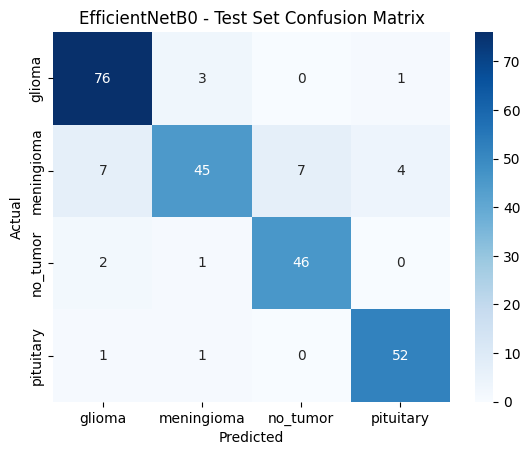

In [55]:

all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('EfficientNetB0 - Test Set Confusion Matrix')
plt.show()


In [56]:
torch.save(model.state_dict(), "efficientnet_b0_brain_tumor.pt")

In [57]:

class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, input, target):
        ce_loss = nn.functional.cross_entropy(input, target, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        return torch.mean(focal_loss) if self.reduction == 'mean' else focal_loss

# Boost meningioma class (index 1)
alpha = torch.tensor([1.0, 2.0, 1.0, 1.0]).to(device)
criterion = FocalLoss(gamma=2, alpha=alpha)


In [58]:

model = efficientnet_b0(pretrained=True)

# Freeze everything first
for param in model.parameters():
    param.requires_grad = False

# Unfreeze features.6 block and classifier
for name, param in model.named_parameters():
    if "features.6" in name or "classifier" in name:
        param.requires_grad = True

# Replace classifier
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(num_ftrs, 4)
)

model = model.to(device)

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [59]:
best_val_loss = float('inf')
patience = 5
trigger_times = 0
num_epochs = 15

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # Train
    model.train()
    train_loss, train_correct, train_total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (preds == labels).sum().item()

    train_acc = train_correct / train_total
    train_loss /= len(train_loader)
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = val_correct / val_total
    val_loss /= len(val_loader)
    print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), "best_efficientnetb0_finetuned.pt")
        print("✔️ Saved best model")
    else:
        trigger_times += 1
        print(f"⚠️ No improvement. Patience count: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("⛔ Early stopping triggered.")
            break

    scheduler.step(val_loss)



Epoch 1/15
Train Loss: 0.8451, Accuracy: 0.5345
Val Loss: 0.7627, Accuracy: 0.7151
✔️ Saved best model

Epoch 2/15
Train Loss: 0.4667, Accuracy: 0.7404
Val Loss: 0.3609, Accuracy: 0.8685
✔️ Saved best model

Epoch 3/15
Train Loss: 0.3280, Accuracy: 0.8183
Val Loss: 0.2572, Accuracy: 0.9064
✔️ Saved best model

Epoch 4/15
Train Loss: 0.2435, Accuracy: 0.8596
Val Loss: 0.2107, Accuracy: 0.9163
✔️ Saved best model

Epoch 5/15
Train Loss: 0.1911, Accuracy: 0.8755
Val Loss: 0.1932, Accuracy: 0.9203
✔️ Saved best model

Epoch 6/15
Train Loss: 0.1679, Accuracy: 0.9032
Val Loss: 0.1718, Accuracy: 0.9343
✔️ Saved best model

Epoch 7/15
Train Loss: 0.1311, Accuracy: 0.9174
Val Loss: 0.1533, Accuracy: 0.9303
✔️ Saved best model

Epoch 8/15
Train Loss: 0.1126, Accuracy: 0.9351
Val Loss: 0.1278, Accuracy: 0.9382
✔️ Saved best model

Epoch 9/15
Train Loss: 0.1058, Accuracy: 0.9316
Val Loss: 0.1278, Accuracy: 0.9442
⚠️ No improvement. Patience count: 1/5

Epoch 10/15
Train Loss: 0.0835, Accuracy: 0.

In [60]:
# Load the best model from fine-tuning
model.load_state_dict(torch.load("best_efficientnetb0_finetuned.pt"))
model.eval()


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98        80
  meningioma       0.92      0.97      0.95        63
    no_tumor       0.98      0.90      0.94        49
   pituitary       0.96      1.00      0.98        54

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



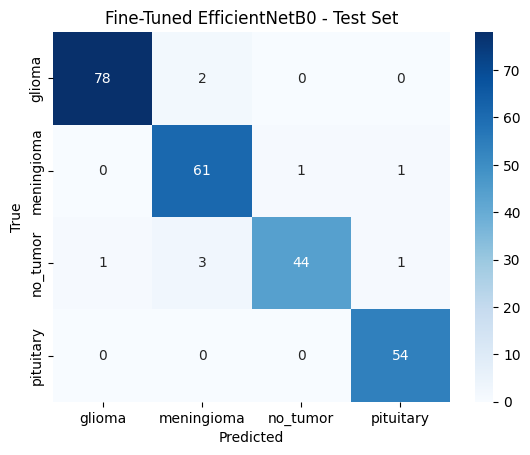

In [61]:

all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Report & Confusion Matrix
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Fine-Tuned EfficientNetB0 - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [62]:
torch.save(model.state_dict(), "efficientnet_b0_final.pt")
